## Multi-class Machine learning using TensorFlow

in this notebook we will learn how to write a neural networks for classification problem:

try to classify something as one thing or another. Several types:
* Binary classification
* multiclass classification
* multilabel classification

In [3]:
#import the modules we might need
def import_modules():
  import tensorflow as tf
  print(tf.__version__)
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  return pd, np, plt, sns, tf
pd, np, plt, sns, tf = import_modules()

2.17.0


In [4]:
# Creating data to view and fit
from sklearn.datasets import make_circles

#make a 1000 examples
n_samples = 1000

#create cricles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [5]:
test = np.array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203]])

In [6]:
test[:,1]

array([0.23148074, 0.15325888, 0.17328203])

In [7]:
#checkout the features
X, X.shape

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 (1000, 2))

In [8]:
#Check out the labels
y, y.shape

(array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 

OK so we have our data but ... it does not make much sense so we need to visualize somehow in order to have a better understing of what is happening !

In [9]:
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


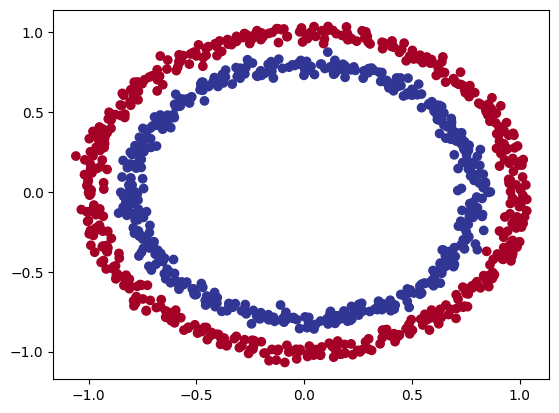

In [10]:
#visualize with a plot
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

### input and output shapes

In [11]:
# Check the shapes (see above)

In [12]:
#view the first example of fearures and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

In [13]:
X.shape[1]

2

### Steps in modelling
So the question: how can we classifiy between red and blue dots ? Well by following the ML workflow

In [14]:
# Split into training and test sets (use of sklearn)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [15]:
X[0].shape, X[0]

((2,), array([0.75424625, 0.23148074]))

In [16]:
tf.random.set_seed(42)
# 1. Build the model
model_1 = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
# 2. Compile the model (binary classification)
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
# 3. Fit the model
history = model_1.fit(X_train,y_train, epochs=100, verbose=False)


In [17]:
# 4. Evaluate the model
y_pred_1 = model_1.evaluate(X_test,y_test)
y_pred_1

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.4519 - loss: 0.6958


[0.6942884922027588, 0.4950000047683716]

In [18]:
X_test.shape, y_test.shape

((200, 2), (200,))

In [19]:
history

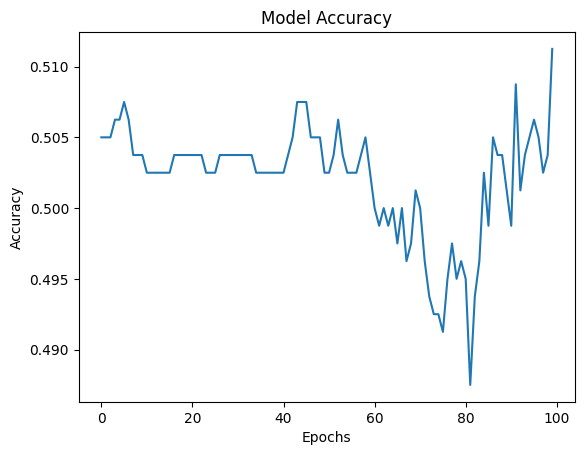

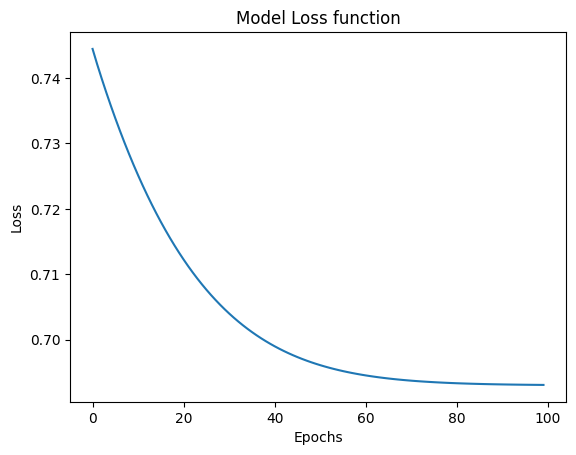

In [20]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

plt.figure()
plt.plot(history.history["loss"])
plt.title("Model Loss function")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

### Let's try to improve the model

In [21]:
tf.random.set_seed(42)
# 1. Build the model
model_2 = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
# 2. Compile the model (binary classification)
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
# 3. Fit the model
history = model_2.fit(X_train,y_train, epochs=200, verbose=False)

In [22]:
# 4. Evaluate the model
y_pred_2 = model_2.evaluate(X_test,y_test)
y_pred_2

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7889 - loss: 0.5680


[0.5662928819656372, 0.7900000214576721]

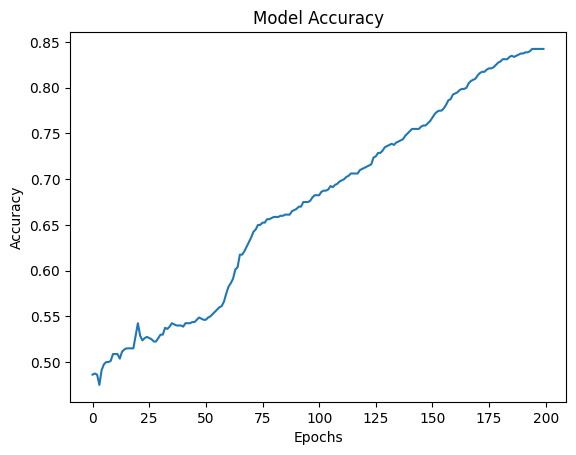

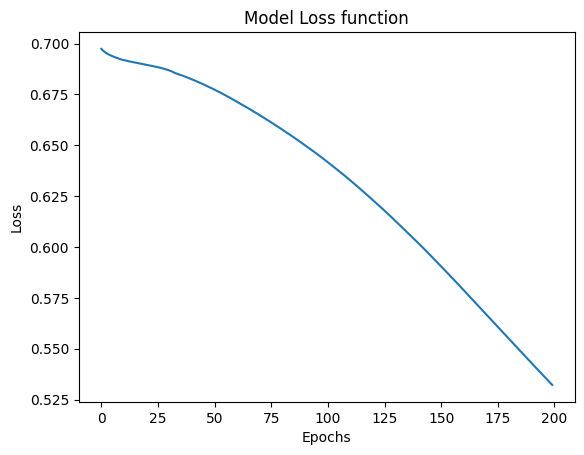

In [23]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

plt.figure()
plt.plot(history.history["loss"])
plt.title("Model Loss function")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

So with a simple second layer we have alreayd improve a lot the model and we get ~88% of accuracy :)

let's make it train for longer: 400 epochs

In [24]:
tf.random.set_seed(42)
# 1. Build the model
model_3 = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
# 2. Compile the model (binary classification)
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
# 3. Fit the model
history = model_3.fit(X_train,y_train, epochs=400, verbose=False)

In [25]:
# 4. Evaluate the model
y_pred_3 = model_3.evaluate(X_test,y_test)
y_pred_3

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9973 - loss: 0.2188


[0.23128926753997803, 0.9950000047683716]

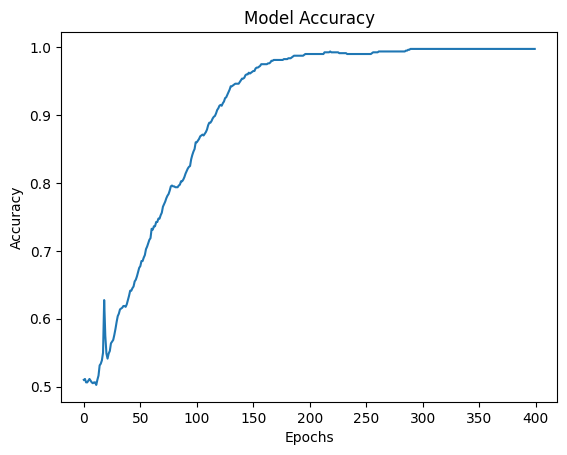

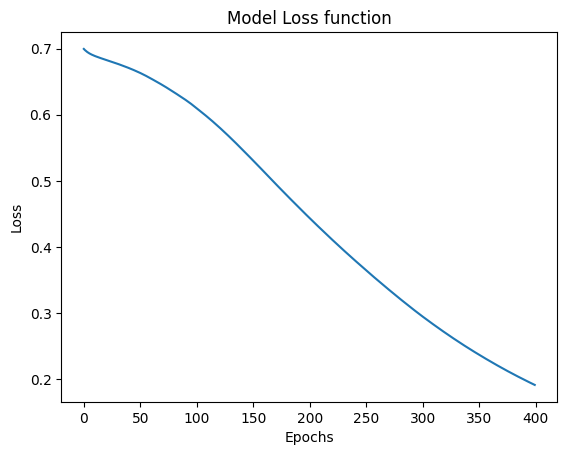

In [26]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

plt.figure()
plt.plot(history.history["loss"])
plt.title("Model Loss function")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

### Create a function to plot of predictions

In [27]:
y_pred = model_3.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


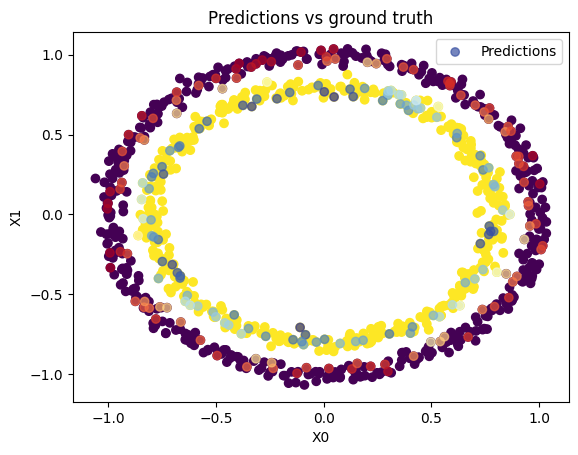

In [28]:
# plot with a function
def plot_predictions(X_test, y_pred, X,y):
  """
  plots the predictions
  """
  plt.figure()
  plt.scatter(X[:,0], X[:,1], c=y)
  plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, cmap=plt.cm.RdYlBu, alpha=0.7, label="Predictions")
  plt.title("Predictions vs ground truth")
  plt.xlabel("X0")
  plt.ylabel("X1")
  plt.legend()
  plt.show()


plot_predictions(X_test,y_pred,X,y)

In [29]:
pd, np, plt, sns, tf = import_modules()

2.17.0


we can also represent that using the boundaries instead:
* Take the train model, X, y
* Create a meshgrid on the diffrent X values
* Make predictions acros the meshgrid
* plot the predictions as well as a line between zones

In [30]:
def plot_decision_boundary(model, X,y):
  """
  Plot the decision boundary created by a model prediction on X.
  1. CS231n - https://cs231n.github.io/neural-networks-case-study/
  2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """

  # Define the axis boundaries of the plot and create a meshgrid:
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() +0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max()+ 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))
  #Create X value (we're going to make predictions on these):
  x_in = np.c_[xx.ravel(), yy.ravel()] #stack 2D arrays together

  #make predictions
  y_pred_beta = model.predict(x_in)

  #check for mutli-class
  if len(y_pred_beta[0]) > 1:
    print("doing multiclass classification")
    y_pred_beta = np.argmax(y_pred_beta, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred_beta = np.round(y_pred_beta).reshape(xx.shape)

  #plot the decision boundary as a countour
  plt.contourf(xx, yy, y_pred_beta, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

#plot_decision_boundary(model_3, X,y)

### Can we further improve it ?

In [31]:
pd, np, plt, sns, tf = import_modules()

2.17.0


In [32]:
tf.random.set_seed(42)
# Let's build a more complicated version and see if we have better results
#1. Build the model
model3_1 = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#2. compile the model
model3_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
                 metrics=["accuracy"])

#3. fit the model
history_3_1 = model3_1.fit(X_train,y_train, epochs=400, verbose=False)

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification


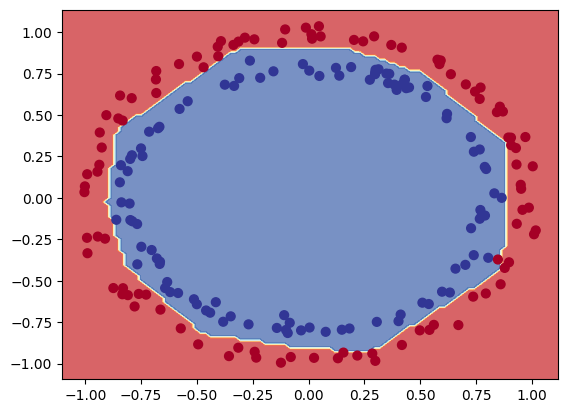

In [33]:
plot_decision_boundary(model3_1, X_test,y_test)

In [34]:
y_eval_mod_3 = model3_1.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9981 - loss: 0.0104


In [35]:
x1, y1 = np.meshgrid(np.linspace(1,2), np.linspace(1,2))
x1.shape, y1.shape

((50, 50), (50, 50))

In [36]:
np.linspace(1,2)

array([1.        , 1.02040816, 1.04081633, 1.06122449, 1.08163265,
       1.10204082, 1.12244898, 1.14285714, 1.16326531, 1.18367347,
       1.20408163, 1.2244898 , 1.24489796, 1.26530612, 1.28571429,
       1.30612245, 1.32653061, 1.34693878, 1.36734694, 1.3877551 ,
       1.40816327, 1.42857143, 1.44897959, 1.46938776, 1.48979592,
       1.51020408, 1.53061224, 1.55102041, 1.57142857, 1.59183673,
       1.6122449 , 1.63265306, 1.65306122, 1.67346939, 1.69387755,
       1.71428571, 1.73469388, 1.75510204, 1.7755102 , 1.79591837,
       1.81632653, 1.83673469, 1.85714286, 1.87755102, 1.89795918,
       1.91836735, 1.93877551, 1.95918367, 1.97959184, 2.        ])

In [37]:
x1[0],x1[1]

(array([1.        , 1.02040816, 1.04081633, 1.06122449, 1.08163265,
        1.10204082, 1.12244898, 1.14285714, 1.16326531, 1.18367347,
        1.20408163, 1.2244898 , 1.24489796, 1.26530612, 1.28571429,
        1.30612245, 1.32653061, 1.34693878, 1.36734694, 1.3877551 ,
        1.40816327, 1.42857143, 1.44897959, 1.46938776, 1.48979592,
        1.51020408, 1.53061224, 1.55102041, 1.57142857, 1.59183673,
        1.6122449 , 1.63265306, 1.65306122, 1.67346939, 1.69387755,
        1.71428571, 1.73469388, 1.75510204, 1.7755102 , 1.79591837,
        1.81632653, 1.83673469, 1.85714286, 1.87755102, 1.89795918,
        1.91836735, 1.93877551, 1.95918367, 1.97959184, 2.        ]),
 array([1.        , 1.02040816, 1.04081633, 1.06122449, 1.08163265,
        1.10204082, 1.12244898, 1.14285714, 1.16326531, 1.18367347,
        1.20408163, 1.2244898 , 1.24489796, 1.26530612, 1.28571429,
        1.30612245, 1.32653061, 1.34693878, 1.36734694, 1.3877551 ,
        1.40816327, 1.42857143, 1.44897959, 1.

In [38]:
y1

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.02040816, 1.02040816, 1.02040816, ..., 1.02040816, 1.02040816,
        1.02040816],
       [1.04081633, 1.04081633, 1.04081633, ..., 1.04081633, 1.04081633,
        1.04081633],
       ...,
       [1.95918367, 1.95918367, 1.95918367, ..., 1.95918367, 1.95918367,
        1.95918367],
       [1.97959184, 1.97959184, 1.97959184, ..., 1.97959184, 1.97959184,
        1.97959184],
       [2.        , 2.        , 2.        , ..., 2.        , 2.        ,
        2.        ]])

### Investigation of the activation functions

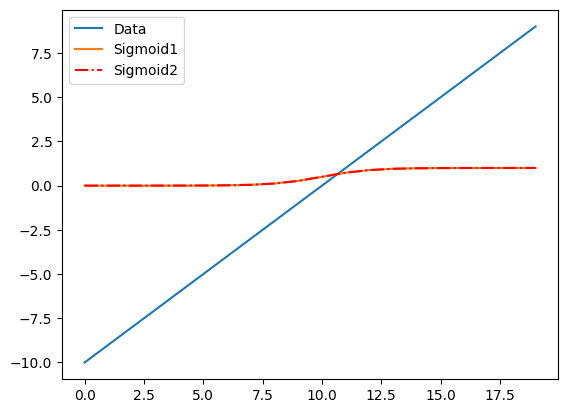

In [39]:
def sigmoid_from_scratch(tensor):
  """
  Implementation of a sigmoid function from scratch sigma(Z) = 1/(1+e^(-Z))
  """
  return 1/(1+tf.exp(-tensor))
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10,10), tf.float32)
sig_s = sigmoid_from_scratch(A)
#Visualize our toy tensor
plt.plot(A, label="Data") #-> linear here !
#Apply the sigmoid activation function directly to our tensor
plt.plot(tf.keras.activations.sigmoid(A), label="Sigmoid1")
plt.plot(sig_s, c="r",linestyle="-.", label="Sigmoid2")
plt.legend()

In [40]:
type(A)

tensorflow.python.framework.ops.EagerTensor

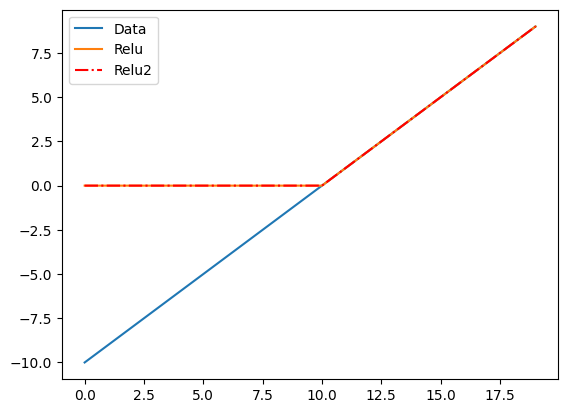

In [41]:
# let's check out ReLU
def relu_from_scratch(tensor):
    """
    Implementation of a ReLU function from scratch
    """
    return tf.maximum(tensor, 0)

relu_s = relu_from_scratch(A)
plt.plot(A, label="Data")
plt.plot(tf.keras.activations.relu(A), label="Relu")
plt.plot(relu_s, c="r", linestyle="-.", label="Relu2")
plt.legend()
plt.show()

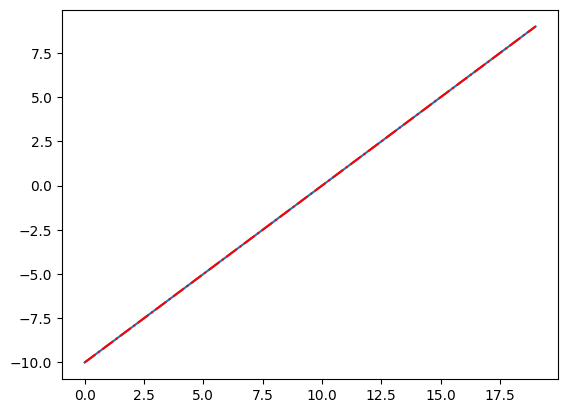

In [42]:
# let's try the linear activation function
plt.plot(tf.keras.activations.linear(A))
plt.plot(A, c="r", linestyle="-.")
plt.show()

In [43]:
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)

In [44]:
xv

array([[0. , 0.5, 1. ],
       [0. , 0.5, 1. ]])

In [45]:
yv

array([[0., 0., 0.],
       [1., 1., 1.]])

In [46]:
x

array([0. , 0.5, 1. ])

In [47]:
y

array([0., 1.])

In [48]:
np.meshgrid(x, y)

[array([[0. , 0.5, 1. ],
        [0. , 0.5, 1. ]]),
 array([[0., 0., 0.],
        [1., 1., 1.]])]

In [49]:
type(np.meshgrid(x, y))

list

In [50]:
x_x = np.c_[xv.ravel(), yv.ravel()]
x_x

array([[0. , 0. ],
       [0.5, 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.5, 1. ],
       [1. , 1. ]])

In [51]:
x_t = np.array([[0,1,2],[0,1,2]])
x_t

array([[0, 1, 2],
       [0, 1, 2]])

In [52]:
x_t.ravel()

array([0, 1, 2, 0, 1, 2])

In [53]:
np.c_[x_t.ravel()]

array([[0],
       [1],
       [2],
       [0],
       [1],
       [2]])

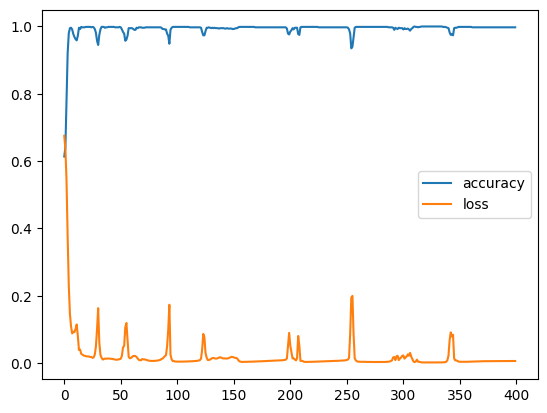

In [54]:
df = pd.DataFrame(history_3_1.history)
df.plot();

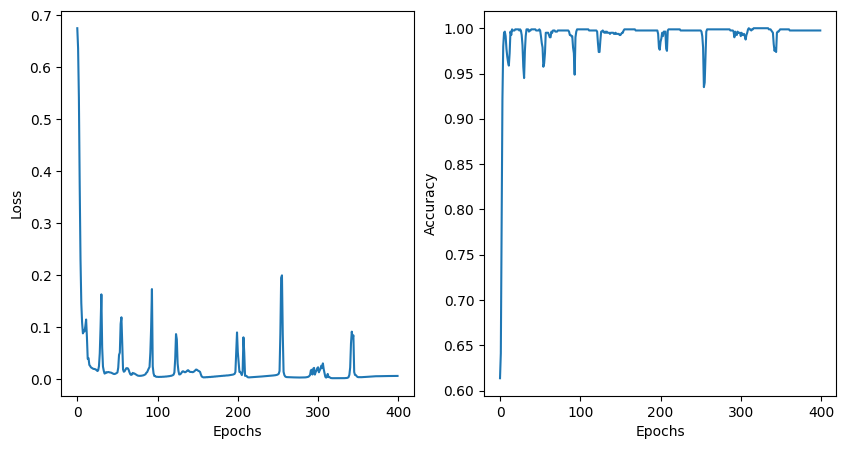

In [55]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
axes[0].plot(history_3_1.history["loss"])
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[1].plot(history_3_1.history["accuracy"])
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
plt.show()

### Adapting the learning rate:




In [56]:
pd, np, plt, sns, tf = import_modules()

2.17.0


In [57]:
X_train[0].shape

(2,)

In [58]:
tf.random.set_seed(42)
#1. Build a model
model9 = tf.keras.Sequential([
          tf.keras.Input(shape=(2,)),
				 tf.keras.layers.Dense(4, activation="relu"),
				 tf.keras.layers.Dense(4, activation="relu"),
				 tf.keras.layers.Dense(1, activation="sigmoid")
])

#Create a learning rate callback
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

#2. Complie the model
model9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer= tf.keras.optimizers.Adam(learning_rate=0.03),
                metrics=["accuracy"])



#3. Fit the model
history = model9.fit(X_train,y_train, epochs=400, verbose=False)


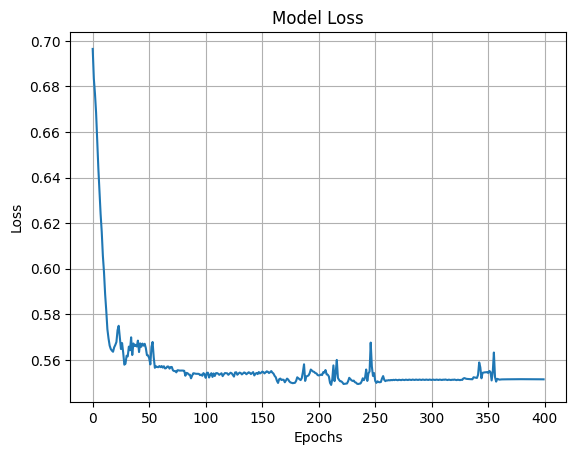

In [59]:
plt.plot(history.history["loss"]);
plt.title("Model Loss");
plt.xlabel("Epochs");
plt.ylabel("Loss");
plt.grid();

In [60]:
y_pred_mod_9 = model9.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


### More classification methods

Alongside visualizing our models as much as possible there are a handful of other classification methods & metrics we shoud be familiar with:

* Accuracy
* Precision
* Recall
* f1-score
* Confusion matrix
* classification report (from sklearn)

In [61]:
# check the accuracy of our model
loss, accuracy = model9.evaluate(X_test,y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.6437 - loss: 0.5804
Model loss on the test set: 0.5847342014312744
Model accuracy on the test set: 64.50%


In [62]:
#Create a confusion metrics
from  sklearn.metrics import confusion_matrix, classification_report

In [63]:
type(y_test), type(y_pred_mod_9)

(numpy.ndarray, numpy.ndarray)

In [64]:
y_test;

In [65]:
y_pred_mod_9;

Let's prettify our confusion matrix !

In [66]:
cm = confusion_matrix(y_test,tf.round(y_pred_mod_9)) # Careful ! sklearn can not handle a mix of binary (0-1) and continuous target(real numbers like 10^-10 ..)

In [67]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn confusion matrix code

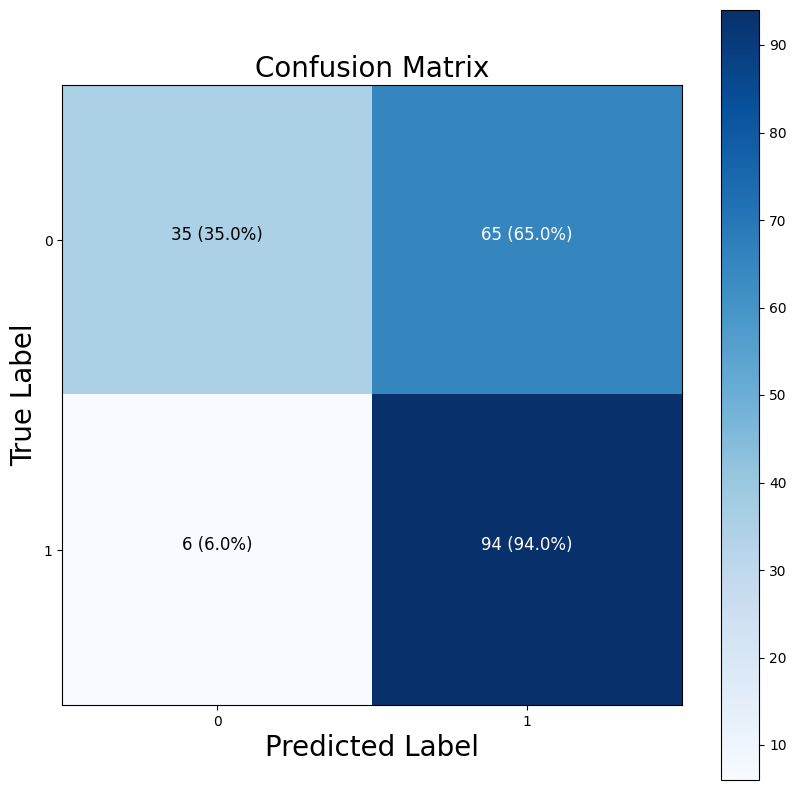

In [68]:
import itertools

figsize = (10,10)

# Create the confusion matrix

cm = confusion_matrix(y_test, tf.round(y_pred_mod_9))
cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  lables = classes
else:
  lables = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=lables,
       yticklabels=lables)
# Set x-axis labels to the bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

#Set threshold for different colors
threshold = (cm.max() + cm.min())/2

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i,
             f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size="large")

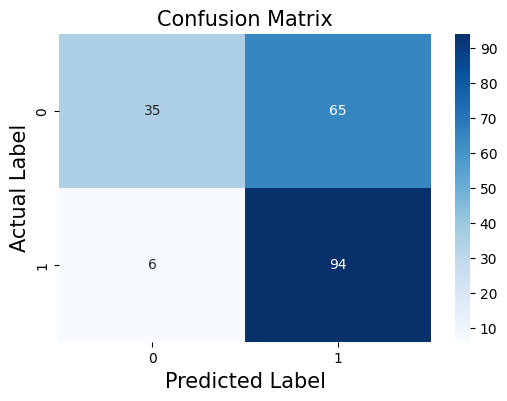

In [69]:
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('Actual Label', fontsize=15)
plt.title('Confusion Matrix', fontsize=15)
plt.show()


## Working with a larger example (multiclass classification)
When we have more than two options -> mutliclass classification
- this means that if we have 3 differents classes, it is a multi-class classification
- it also mean that if we have a 1000 classes, it is a mutli-class classification.

In [70]:
# Let's bring back all of our modules in order to avoid relauching everything from the top
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report

In [71]:
print(tf.__version__)

2.17.0


### 1. Prepare the data

We want to build a neural network to classify images of different items of clothing. We can use the built-in `fashion_mnist`data base (in Tensorflow)

https://www.tensorflow.org/datasets/catalog/fashion_mnist?hl=fr

In [72]:
# import the dataset:
fm = tf.keras.datasets.fashion_mnist
# the data has already been splitted into test and train data !
(X_train, y_train), (X_test, y_test) = fm.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [73]:
# check the correct size:
assert (X_train.shape) == (60000, 28, 28)
assert (X_test.shape) == (10000, 28, 28)
assert (y_train.shape) == (60000,)
assert (y_test.shape) == (10000,)

In [74]:
# Show the first traininng example:
print(f"Training sample:\n{X_train[0]}")
print(f"Training label: \n{y_train[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [75]:
# Check the shape of a single example
X_train[0].shape, y_train[0].shape

((28, 28), ())

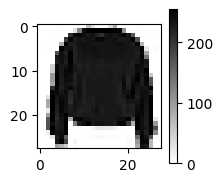

In [76]:
# plot a signle sample
plt.figure(figsize=(2,2))
plt.imshow(X_train[7], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [77]:
y_train[7]

2

In [78]:
# let's represent our labels into human readable information:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_names[y_train[7]]

'Pullover'

In [79]:
len(class_names)

10

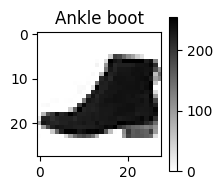

In [80]:
# plot another example image its label
index = 7000
plt.figure(figsize=(2,2))
plt.imshow(X_train[index], cmap=plt.cm.binary)
plt.colorbar()
plt.title(f"{class_names[y_train[index]]}")
plt.grid(False)
plt.show()

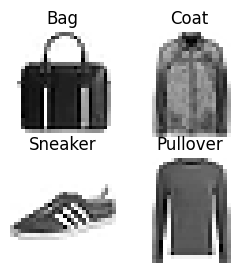

In [81]:
# plot multiple random images of our dataset
import random
plt.figure(figsize=(3,3))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
  plt.title(f"{class_names[y_train[rand_index]]}")
  plt.axis("off")

Here we need to pay attention at the shape (linear, or not ? ) so investigating the data set is a good idea !

### 2. Choose or build a model
if the labels are one-hot encoded: use CategoricalCrossentropy()
of if our labels are integer, use SparseCategoricalCrossentropy()

In [82]:
#Let's build a model
#first set a random seed:
tf.random.set_seed(42)
# Let's build a model
#1. Build a model: our data needs to be flatten from 28*28 to None*784
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10,activation ="softmax")
])

#2. Compile the mode

model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # this loss function is used because we use not one hot encoded labels or features
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"]
              )

# we could have use: tf.one_hot(y_train) in order to one-hot encode and use our CategoricalCrossentropy() loss function

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 3. Train the model

In [83]:
X_train.ndim, y_train.ndim
model1.output_shape, model1.input_shape

((None, 10), (None, 28, 28))

In [84]:
#3. Fit the model
history1 = model1.fit(X_train, y_train, epochs=10, verbose=True, validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1377 - loss: 5.0986 - val_accuracy: 0.2603 - val_loss: 1.8025
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3216 - loss: 1.6939 - val_accuracy: 0.4190 - val_loss: 1.3999
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3890 - loss: 1.4049 - val_accuracy: 0.3723 - val_loss: 1.6794
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4112 - loss: 1.3712 - val_accuracy: 0.4385 - val_loss: 1.2834
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4387 - loss: 1.2906 - val_accuracy: 0.4627 - val_loss: 1.2617
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4402 - loss: 1.2988 - val_accuracy: 0.4597 - val_loss: 1.2489
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4548 - loss: 1.2671 - val_accuracy: 0.4407 - val_loss: 1.2458
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4513 - loss: 1.2590 - 

val_loss and val_accuracy are values on the validation data !

In [85]:
model1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,212 (94.58 KB)

 Trainable params: 8,070 (31.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,142 (63.06 KB)

### 4. Evaluate the model

In [86]:
# Let's evaluate our model first
loss1, accuracy1 = model1.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss1:.2f}")
print(f"Model accuracy on the test set: {accuracy1*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4539 - loss: 1.2270
Model loss on the test set: 1.23
Model accuracy on the test set: 45.12%


Not bad but maybe we can do better

In [87]:
X_train.min(), X_train.max()

(0, 255)

NN prefer data to be scaled (or normalized). This means we should have values betweend 0 and 1.

In [88]:
X_train_norm = X_train/float(X_train.max())
X_test_norm = X_test/float(X_test.max())
X_train_norm.max(), X_test_norm.max(), X_train_norm.min(), X_test_norm.min()

(1.0, 1.0, 0.0, 0.0)

In [89]:
# Let's use our model without changing anything !
tf.random.set_seed(42)

#1. Create a model (nothing change wrt the previous one beside the normalization)
model1_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")

])

#2. COmpile the mode
model1_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics = ["accuracy"]
                 )
#3. Fit the model
history1_2 = model1_2.fit(X_train_norm, y_train, epochs=10, verbose=True, validation_data=(X_test_norm, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6442 - loss: 1.0042 - val_accuracy: 0.8208 - val_loss: 0.5230
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8324 - loss: 0.4842 - val_accuracy: 0.8322 - val_loss: 0.4819
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8451 - loss: 0.4464 - val_accuracy: 0.8379 - val_loss: 0.4677
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8517 - loss: 0.4286 - val_accuracy: 0.8422 - val_loss: 0.4557
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8551 - loss: 0.4167 - val_accuracy: 0.8439 - val_loss: 0.4489
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8576 - loss: 0.4083 - val_accuracy: 0.8460 - val_loss: 0.4440
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8603 - loss: 0.4008 - val_accuracy: 0.8464 - val_loss: 0.4421
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8617 - loss: 0.3951 - 

We can see that we have increase by 10% our accuracy !

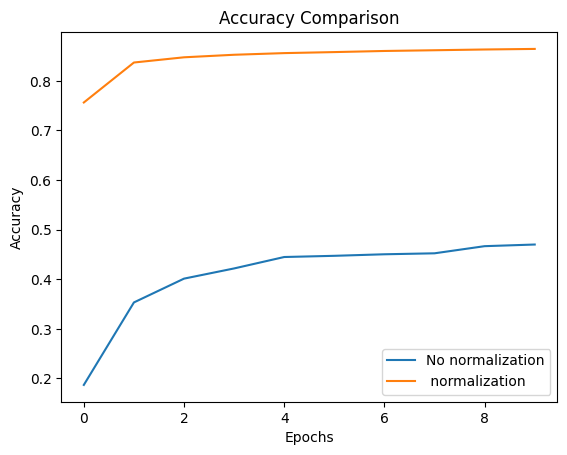

In [90]:
plt.figure()
plt.plot(history1.history["accuracy"], label="No normalization")
plt.plot(history1_2.history["accuracy"], label=" normalization")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.show()

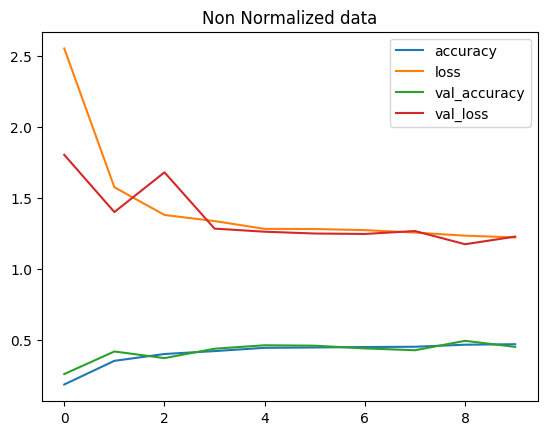

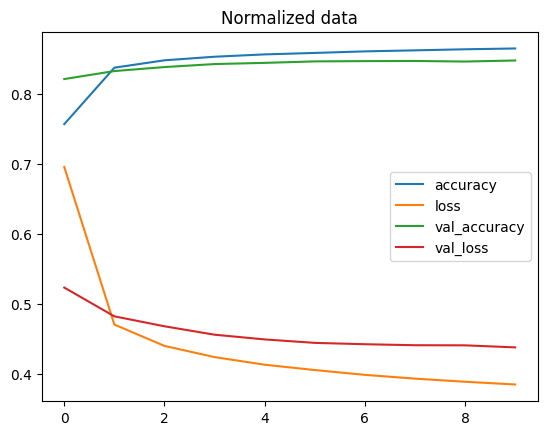

In [91]:
# we can do this also:
pd.DataFrame(history1.history).plot(title="Non Normalized data");
pd.DataFrame(history1_2.history).plot(title="Normalized data");

### 5. Improve the model

In [52]:
# find the ideal learning rate
tf.random.set_seed(42)

#1. Create model
model1_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#2. Compile the mode
model1_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )
# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

#3. Fit the model
lr_history = model1_3.fit(X_train_norm, y_train, epochs=100, verbose=False,
             validation_data=(X_test_norm, y_test),
             callbacks=[lr_scheduler])

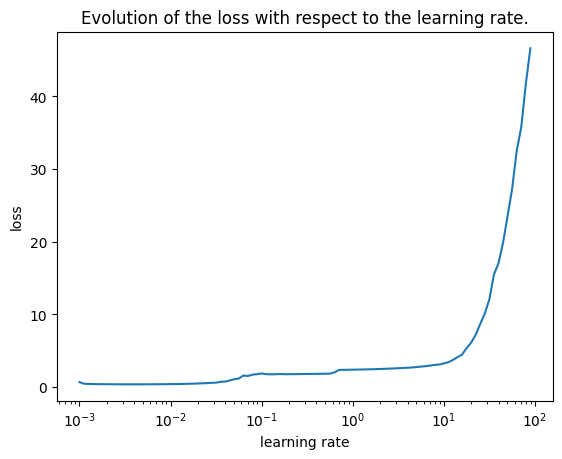

In [54]:
lrs = 1e-3 * (10**(tf.range(100)/20))#we could have use np.arange() instead !
plt.semilogx(lrs, lr_history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("Evolution of the loss with respect to the learning rate.")
plt.show()

ok we will take 10e-3 (default value for Adam())

In [137]:
x = tf.keras.Input(shape=(28,28))
y = tf.keras.layers.Flatten()(x)
y.shape

(None, 784)

In [138]:
tf.random.set_seed(42)
model_test = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_test.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"]
                )

model_test.fit(X_train_norm, y_train, epochs=10, verbose=True)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5414 - loss: 1.2060
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8085 - loss: 0.5349
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8312 - loss: 0.4819
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8422 - loss: 0.4531
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8483 - loss: 0.4355
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8533 - loss: 0.4225
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8572 - loss: 0.4125
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8597 - loss: 0.4043
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8612 - loss: 0.3972
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8637 - loss: 0.3909


In [141]:
y_test = model_test.predict(X_test_norm[0].reshape(1,28,28))
y_test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[2.9971066e-08, 2.4665728e-10, 6.0207478e-10, 2.2708369e-13,
        1.2354879e-09, 1.2705560e-01, 1.3790465e-07, 2.8656941e-02,
        1.5706458e-03, 8.4271663e-01]], dtype=float32)

In [142]:
X_test_norm[0].shape

(28, 28)

### 6. Save and load the model

In [94]:
# save the best model for further analysis if we leave the computer
model1_2.save("model1_2.keras")
!cp "/content/model1_2.keras" "/content/drive/MyDrive/Colab Notebooks"

In [95]:
# laod model
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/model1_2.keras")

### Evaluating our multi-class classification model

to evaluate our mutli-class classification model we could:

- evaluate its performances using other classsification metrics such as confusion matrix
- assess some of its predictions (through visualization)
- improve its results by training long or changing its architecture

Let's go through the top 2 !

In [108]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = loaded_model.predict(X_test_norm) #always to make prediction on the same kind of data our model was trained on !
class_names[tf.argmax(y_pred[0])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


'Ankle boot'

In [113]:
# Convert all the prediction probabilities into integer; i.e.?, find the index of the most likly probabilty
y_pred_labels = np.array([tf.argmax(item) for item in y_pred])
y_pred_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [110]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

So now that we have the same kind of data for the predictions and the true labels we can compare the two

In [114]:
# confusion matrix
y_pred_labels.shape, y_test.shape

((10000,), (10000,))

In [124]:
cm = confusion_matrix(y_test, y_pred_labels)

In [126]:
cm/10

array([[79.7,  0.6,  1.6,  5.2,  0.2,  0.2, 11.4,  0. ,  1. ,  0.1],
       [ 0.1, 96.7,  0.4,  2.2,  0.3,  0. ,  0.3,  0. ,  0. ,  0. ],
       [ 1.6,  0.6, 79.9,  2.1, 11.2,  0. ,  4.3,  0. ,  0.3,  0. ],
       [ 2.7,  3.4,  1.5, 84.9,  4.2,  0.1,  2.9,  0. ,  0.3,  0. ],
       [ 0. ,  0.4, 13.4,  2.5, 79.2,  0. ,  4.3,  0. ,  0.2,  0. ],
       [ 0.1,  0.1,  0. ,  0. ,  0. , 91.5,  0. ,  6. ,  0.3,  2. ],
       [13.9,  0.4, 15.6,  4.2, 11.9,  0. , 53.2,  0. ,  0.8,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  2.3,  0. , 96.4,  0. ,  1.3],
       [ 0.2,  0.4,  1.1,  1.3,  0.5,  0.6,  1.4,  0.5, 94. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  1.1,  0.1,  7. ,  0. , 91.8]])

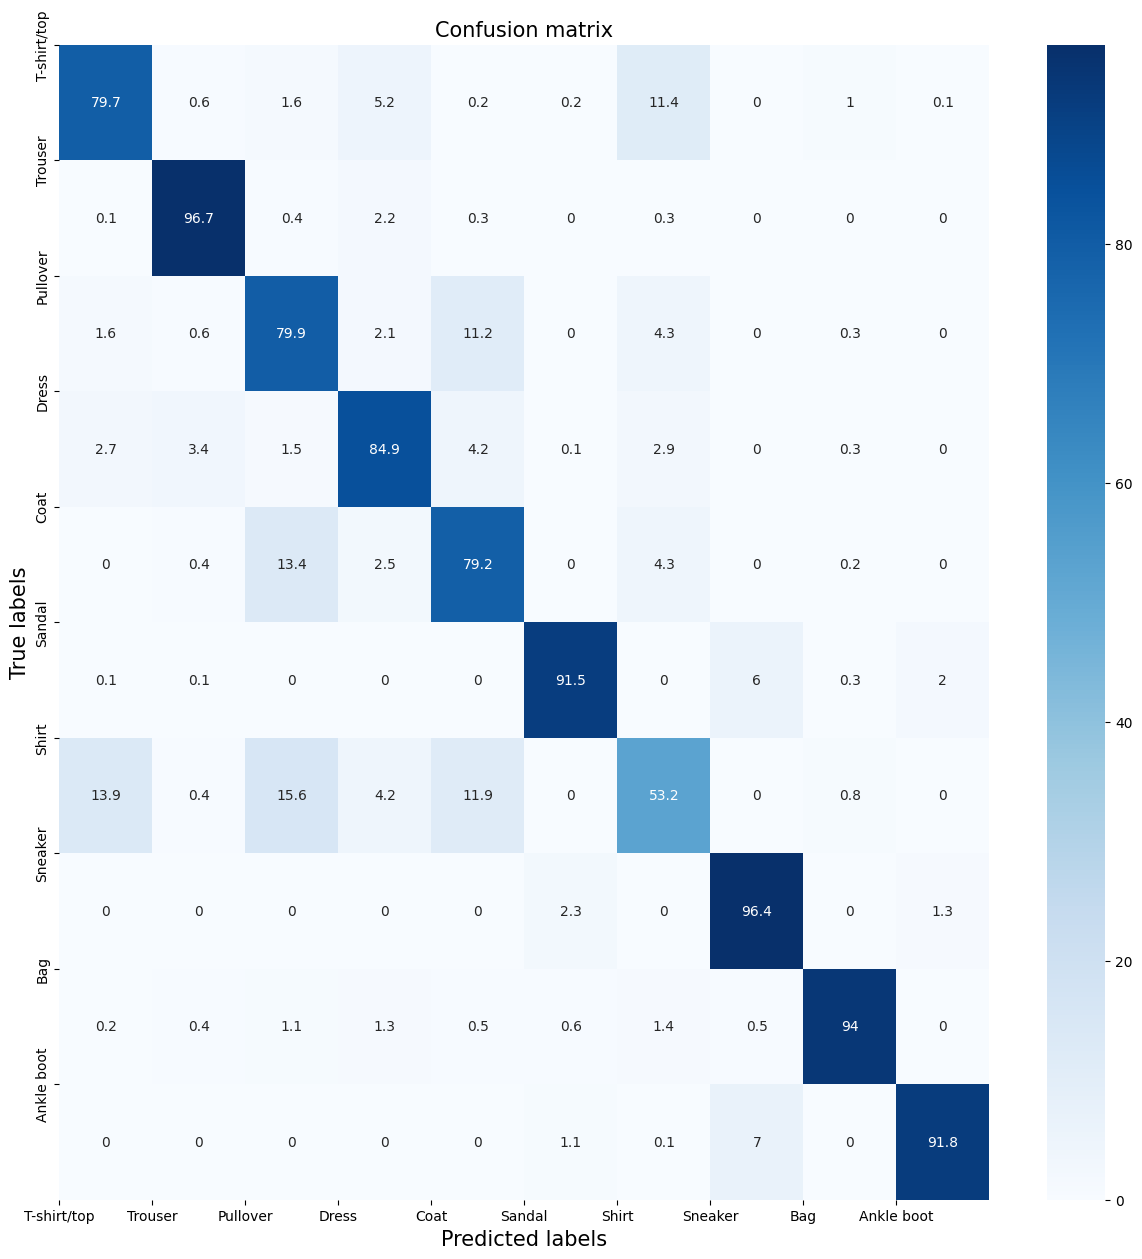

In [131]:
# let represent this in a better way !
plt.figure(figsize=(15,15))
sns.heatmap(cm/10, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted labels", fontsize=15)
plt.ylabel("True labels", fontsize=15)
plt.title("Confusion matrix", fontsize=15)
plt.xticks(ticks=np.arange(10), labels=class_names)
plt.yticks(ticks=np.arange(10),labels=class_names)
plt.show()

AttributeError: module 'tensorflow' has no attribute 'flatten'